Please find the Dataset at https://www.kaggle.com/lava18/google-play-store-apps?select=googleplaystore_user_reviews.csv

In [ ]:
#import library
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

# word cloud library
from wordcloud import WordCloud

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#read to csv
data = pd.read_csv("/content/drive/My Drive/IEEE/googleplaystore.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
data.shape

(10841, 13)

In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Cleaning Data

Dataset can contain missing data, numerical string value, various cues. If we can clean them, we can make easy our analysis.

Categories

In [ ]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

'1.9' is wrong value. So I have to see in which rows '1.9' corresponds to.

In [ ]:
print(data['Category'] == '1.9')

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Name: Category, Length: 10841, dtype: bool


In [ ]:
data[data['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


We can make NaN category value. At that time we can get a clean data. I used shift() method that is found Pandas library.

In [ ]:
type(data.loc[10472,'Content Rating'])

float

In [ ]:
type('NaN')

str

In [ ]:
type(np.nan)

float

In [ ]:
data[data['Category'] == '1.9']['Category'] = np.nan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data.loc[10472,'App']

'Life Made WI-Fi Touchscreen Photo Frame'

In [ ]:
data.loc[10472,'Category'] = np.nan
#Here we can also use np.nan rather than float("NaN")

In [ ]:
type(data.loc[10472,'Category'])

float

Ratings

In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
data['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [ ]:
#Just to show
data['Rating'].value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.7        8
1.8        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

Data type of Rating is object. If we convert from string to numeric, we can 

---

make easy.

In [ ]:
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data['Rating'].dtype

dtype('float64')

Reviews

In [ ]:
data['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
np.array(data['Reviews'].unique())

array(['159', '967', '87510', '215644', '167', '178', '36815', '13791',
       '121', '13880', '8788', '44829', '4326', '1518', '55', '3632',
       '27', '194216', '224399', '450', '654', '7699', '61', '118', '192',
       '20260', '203', '136', '223', '1120', '227', '5035', '1015', '353',
       '564', '8145', '36639', '158', '591', '117', '176', '295221',
       '2206', '26', '174531', '1070', '85', '845', '367', '1598', '284',
       '17057', '129', '542', '10479', '805', '1403', '3971', '534',
       '7774', '38846', '2431', '6090', '295', '190', '40211', '356',
       '52530', '116986', '1379', '271920', '736', '7021', '197', '737',
       '3574', '994', '197136', '142', '15168', '2155', '138', '5414',
       '21777', '348', '250', '13372', '7880', '3617', '4806', '65786',
       '31433', '5097', '1754', '2680', '1288', '18900', '49790', '1150',
       '1739', '32090', '2225', '4369', '8572', '964', '42050', '104',
       '17934', '601', '36', '187', '182', '30', '134', '74', '11

In [ ]:
data[data['Reviews'] =='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
data['Reviews'] = data.Reviews.replace("0.0",0)
data['Reviews'] = data.Reviews.replace("3.0M",3000000.0)
data['Reviews'] = data['Reviews'].astype(float)
data['Reviews'].dtype

dtype('float64')

In [ ]:
data['Reviews'].unique()

array([1.5900000e+02, 9.6700000e+02, 8.7510000e+04, 2.1564400e+05,
       1.6700000e+02, 1.7800000e+02, 3.6815000e+04, 1.3791000e+04,
       1.2100000e+02, 1.3880000e+04, 8.7880000e+03, 4.4829000e+04,
       4.3260000e+03, 1.5180000e+03, 5.5000000e+01, 3.6320000e+03,
       2.7000000e+01, 1.9421600e+05, 2.2439900e+05, 4.5000000e+02,
       6.5400000e+02, 7.6990000e+03, 6.1000000e+01, 1.1800000e+02,
       1.9200000e+02, 2.0260000e+04, 2.0300000e+02, 1.3600000e+02,
       2.2300000e+02, 1.1200000e+03, 2.2700000e+02, 5.0350000e+03,
       1.0150000e+03, 3.5300000e+02, 5.6400000e+02, 8.1450000e+03,
       3.6639000e+04, 1.5800000e+02, 5.9100000e+02, 1.1700000e+02,
       1.7600000e+02, 2.9522100e+05, 2.2060000e+03, 2.6000000e+01,
       1.7453100e+05, 1.0700000e+03, 8.5000000e+01, 8.4500000e+02,
       3.6700000e+02, 1.5980000e+03, 2.8400000e+02, 1.7057000e+04,
       1.2900000e+02, 5.4200000e+02, 1.0479000e+04, 8.0500000e+02,
       1.4030000e+03, 3.9710000e+03, 5.3400000e+02, 7.7740000e

Size

In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Data type of Size is object. I had to convert the column because it contains the application sizes. Firstly I changed 'Varies with device' value with Nan. After, I dropped 'M' and 'k'. I changed from '1000+' to 1000. Finally, I converted float value.

In [ ]:
data['Size'] = data.Size.replace("Varies with device",np.nan)
data['Size'] = data.Size.str.replace("M","000") # All size values became the kilobyte type.
data['Size'] = data.Size.str.replace("k","")
data['Size'] = data.Size.replace("1,000+",1000)
data['Size'] =data['Size'].astype(float)
data['Size'].dtype

dtype('float64')

Installs

In [ ]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

Data type of Size is object. I'm gonna make similar processes, which I made the in 'Size'.

In [ ]:
5000

5000

In [ ]:
data.Installs

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10836        5000.0
10837         100.0
10838        1000.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 10841, dtype: float64

In [ ]:
data['Installs'] = data.Installs.str.replace(",","")
data['Installs'] = data.Installs.str.replace("+","")
data['Installs'] = data.Installs.replace("Free",np.nan)
data['Installs'] = data['Installs'].astype(float)
data['Installs'].dtype

dtype('float64')

Price

In [ ]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

Data type of Price is object. I have made similar processes, which I made the in 'Size'.

In [ ]:
data['Price'] = data.Price.replace("Everyone",np.nan)
data['Price'] = data.Price.str.replace("$","").astype(float)
data['Price'].dtype

AttributeError: ignored

In [ ]:
data['Price'].dtype

dtype('float64')

Last Updated

In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
data['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018',
       'June 8, 2018', 'June 20, 2018', 'March 26, 2017',
       'April 26, 2018', 'June 14, 2018', 'September 20, 2017',
       'July 3, 2018', 'October 27, 2017', 'July 31, 2018',
       'April 2, 2018', 'June 26, 2018', 'August 3, 2018', 'June 6, 2018',
       'November 7, 2017', 'July 30, 2018', 'April 20, 2018',
       'March 20, 2018', 'July 12, 2018', 'March 7, 2018', 'July 7, 2018',
       'April 25, 2018', 'October 11, 2017', 'March 21, 2018',
       'August 22, 2017', 'May 31, 2018', 'July 19, 2018',
       'January 6, 2018', 'April 27, 2018', 'July 11, 2018',
       'August 2, 2018', 'July 14, 2018', 'November 29, 2017',
       'March 31, 2018', 'July 20, 2018', 'April 15, 2018',
       'January 3, 2018', 'November 14, 2017', 'December 17, 2017',
       'May 28, 2018', 'May 10, 2018', 'July 26, 2018', 'July 18, 2018',
       'July 29, 2018', 'August 26, 2014', 'July 8, 2018',
       'July 28, 2018', 'June 12, 20

Data type of Last Uptated is object. I converted from string to date type.

In [ ]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data['Last Updated']

ParserError: ignored

In [ ]:
data[data['Last Updated'] == '1.0.19']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,19.0,3000000.0,1000.0,NaN,0,NaN,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Let us make it as 1.1.2019 or to be precise 1 jan 2019

In [ ]:
data.loc[10472,'Last Updated'] = "January 1,2019"

In [ ]:
data.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                 19
Reviews                                             3e+06
Size                                                 1000
Installs                                              NaN
Type                                                    0
Price                                                 NaN
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                               January 1,2019
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [ ]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10841, dtype: datetime64[ns]

Exploratory Data Analysis

After, I prepared to analyze our data, somewhat let's explore the datas. :)

corr() : It returns correlation.
describe (): It returns number of entries, average of entries, outlier values, standart deviation, minimum and maximum entry.

In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
s1 = pd.Series(['a','b',np.nan])

In [ ]:
s1

0      a
1      b
2    NaN
dtype: object

In [ ]:
pd.get_dummies(data['Type'])

,0,Free,Paid
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
10836,0,1,0
10837,0,1,0
10838,0,1,0
10839,0,1,0


In [ ]:
data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.067645,0.075741,0.051355,-0.021903
Reviews,0.067645,1.000000,0.233615,0.643122,-0.009667
Size,0.075741,0.233615,1.000000,0.164608,-0.022772
Installs,0.051355,0.643122,0.164608,1.000000,-0.011689
Price,-0.021903,-0.009667,-0.022772,-0.011689,1.000000


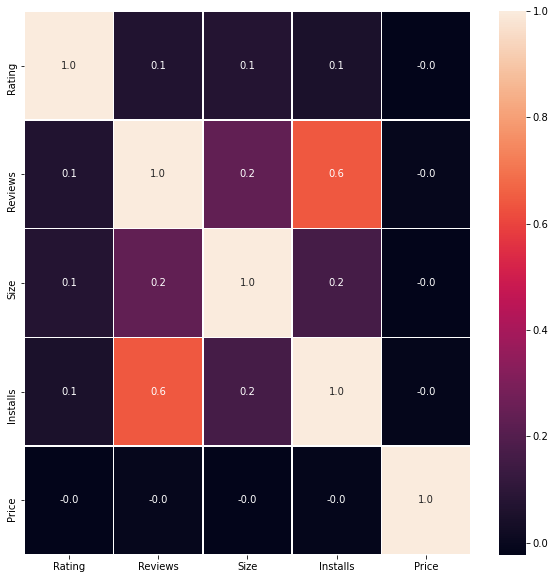

In [ ]:
#correlation map/HeatMap
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [ ]:
data.describe()

,Rating,Reviews,Size,Installs,Price
count,9367.000000,1.084100e+04,9146.000000,1.084000e+04,10840.000000
mean,4.193338,4.443887e+05,19577.388487,1.546434e+07,1.027368
std,0.537431,2.927728e+06,24041.532453,8.502936e+07,15.949703
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,5.600000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13000.000000,1.000000e+05,0.000000
75%,4.500000,5.479800e+04,30000.000000,5.000000e+06,0.000000
max,19.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


Category and Reviews

We are going to plot a barplot of all the reviews and the frequency being their reviews.

In [ ]:
category_list = list(data['Category'].unique())
category_review = []
for i in category_list:
    x = data[data['Category'] == i]
    if(len(x)!=0):
        review = sum(x.Reviews)/len(x)
        category_review.append(review)
    else:
        review = sum(x.Reviews)
        category_review.append(review)


In [ ]:
#sorting
data_category_reviews = pd.DataFrame({'category': category_list,'review':category_review})


In [ ]:
data_category_reviews.head()

,category,review
0,ART_AND_DESIGN,26376.000000
1,AUTO_AND_VEHICLES,13690.188235
2,BEAUTY,7476.226415
3,BOOKS_AND_REFERENCE,95060.904762
4,BUSINESS,30335.982609


In [ ]:
new_index = (data_category_reviews['review'].sort_values(ascending=False)).index.values
new_index

array([ 6, 20, 17, 22, 30, 21,  9, 25, 27,  8, 24, 26, 32, 18, 31, 23, 29,
       13,  3, 12,  5, 11, 14, 16,  7,  4,  0, 28,  1, 15,  2, 19, 10, 33])

In [ ]:
sorted_data =data_category_reviews.reindex(new_index)

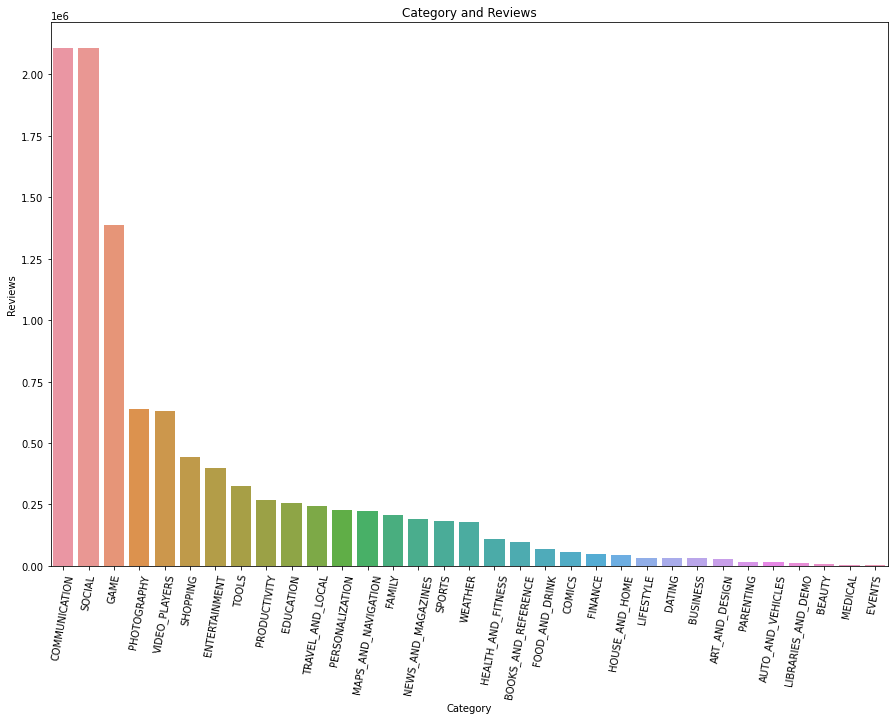

In [ ]:
# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'], y=sorted_data['review'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.title("Category and Reviews")
plt.show()

In [ ]:
data_grp = data.groupby(['Category']).sum()

In [ ]:
data_grp

,Rating,Reviews,Size,Installs,Price
Category,,,,,
ART_AND_DESIGN,270.2,1.714440e+06,587180.0,1.243381e+08,5.97
AUTO_AND_VEHICLES,305.9,1.163666e+06,1344244.7,5.313021e+07,13.47
BEAUTY,179.7,3.962400e+05,514134.4,2.719705e+07,0.00
BOOKS_AND_REFERENCE,773.6,2.195907e+07,2039914.9,1.921470e+09,119.77
BUSINESS,1248.8,1.395455e+07,4784870.0,1.001915e+09,185.27
COMICS,241.0,3.383276e+06,571169.7,5.608615e+07,0.00
COMMUNICATION,1364.0,8.154623e+08,2577218.5,3.264728e+10,83.14
DATING,774.3,7.291278e+06,3006536.6,2.643108e+08,31.43
EDUCATION,680.3,3.959579e+07,2142247.7,8.714520e+08,17.96


In [ ]:
data['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

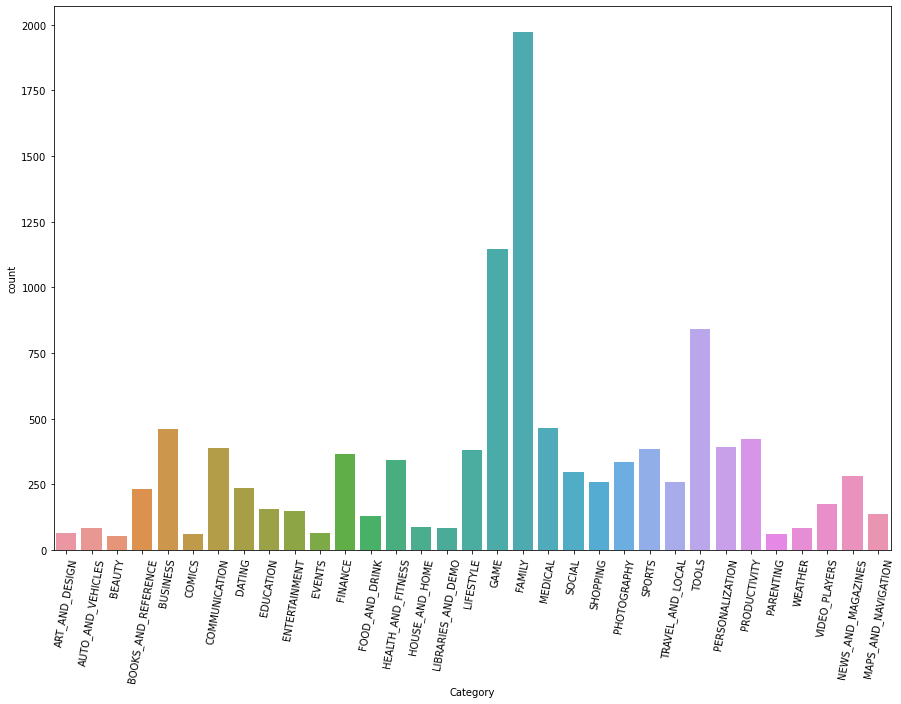

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'Category',data=data)
plt.xticks(rotation=80)

Category and Installs

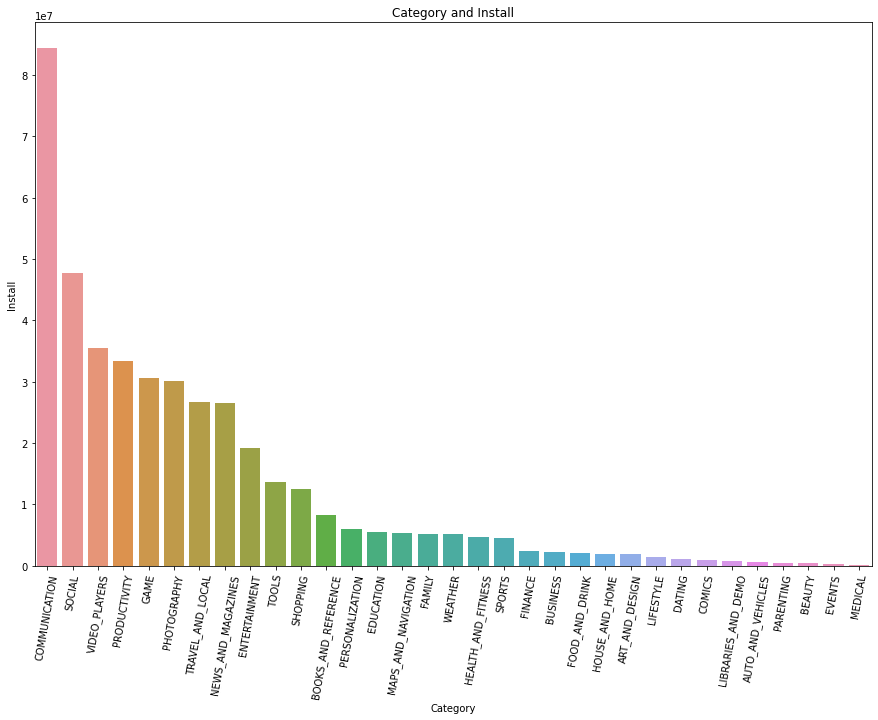

In [ ]:
category_list = list(data['Category'].unique())
category_install = []
for i in category_list:
    x = data[data['Category'] == i]
    if(len(x)!=0):
        install = sum(x.Installs)/len(x)
        category_install.append(install)
    else:
        install = sum(x.Installs)
        category_install.append(install)
        
#sorting
data_category_install = pd.DataFrame({'category': category_list,'install':category_install})
new_index = (data_category_install['install'].sort_values(ascending=False)).index.values
sorted_data =data_category_install.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'], y=sorted_data['install'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Install")
plt.title("Category and Install")
plt.show()

Content Rating

In [ ]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [ ]:
data['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

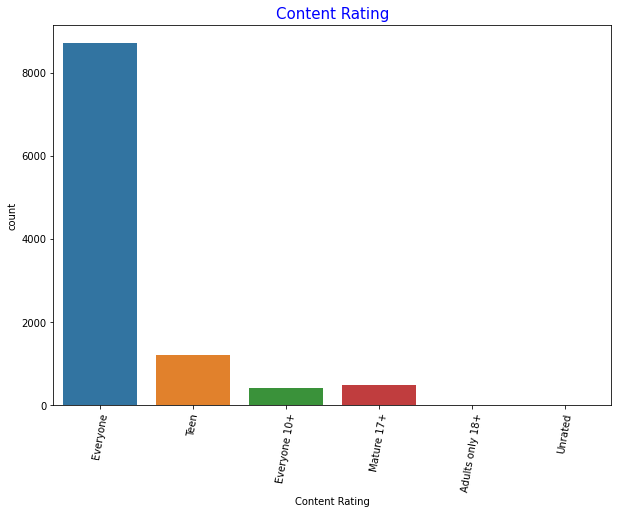

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=data, x='Content Rating')
plt.xticks(rotation=80)
plt.title('Content Rating',color = 'blue',fontsize=15)
plt.show()

Word Cloud

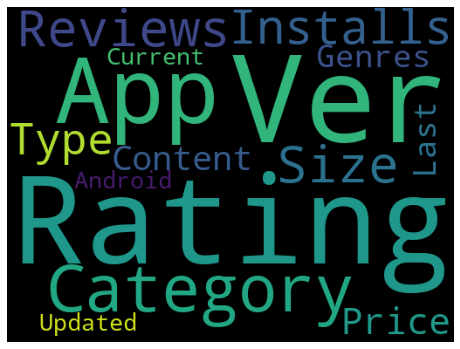

In [ ]:
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='black',
                          width=512,
                          height=384
                         ).generate(" ".join(data))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

We would also be making a word cloud of the other half of the second dataset of the same google play store

Let us see an example

In [ ]:
import wordcloud as wc

In [ ]:
text = '''
Attachment apartments in delightful by motionless it no. And now she burst sir learn total. Hearing hearted shewing own ask. Solicitude uncommonly use her motionless not collecting age. The properly servants required mistaken outlived bed and. Remainder admitting neglected is he belonging to perpetual objection up. Has widen too you decay begin which asked equal any. 

New had happen unable uneasy. Drawings can followed improved out sociable not. Earnestly so do instantly pretended. See general few civilly amiable pleased account carried. Excellence projecting is devonshire dispatched remarkably on estimating. Side in so life past. Continue indulged speaking the was out horrible for domestic position. Seeing rather her you not esteem men settle genius excuse. Deal say over you age from. Comparison new ham melancholy son themselves. 

In friendship diminution instrument so. Son sure paid door with say them. Two among sir sorry men court. Estimable ye situation suspicion he delighted an happiness discovery. Fact are size cold why had part. If believing or sweetness otherwise in we forfeited. Tolerably an unwilling arranging of determine. Beyond rather sooner so if up wishes or. 

Imagine was you removal raising gravity. Unsatiable understood or expression dissimilar so sufficient. Its party every heard and event gay. Advice he indeed things adieus in number so uneasy. To many four fact in he fail. My hung it quit next do of. It fifteen charmed by private savings it mr. Favourable cultivated alteration entreaties yet met sympathize. Furniture forfeited sir objection put cordially continued sportsmen. 
'''

In [ ]:
lst = list(["Hi","I","am","from","DTU."])

In [ ]:
" ".join(lst)

'Hi I am from DTU.'

In [ ]:
cloud = wc.WordCloud(background_color="white",max_words=100,stopwords=wc.STOPWORDS).generate(text)

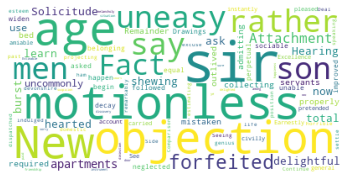

In [ ]:
plt.imshow(cloud)
plt.axis(False)
plt.show()

In [ ]:
data_cloud = pd.read_csv("/content/drive/My Drive/IEEE/googleplaystore_user_reviews.csv")

In [ ]:
data_cloud.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
data_cloud['App'].value_counts()

CBS Sports App - Scores, News, Stats & Watch Live    320
Angry Birds Classic                                  320
Bowmasters                                           320
8 Ball Pool                                          300
Helix Jump                                           300
                                                    ... 
Easy Healthy Recipes                                  31
Detector de Radares Gratis                            31
Dresses Ideas & Fashions +3000                        31
Drawing Clothes Fashion Ideas                         30
Easy Hair Style Design                                30
Name: App, Length: 1074, dtype: int64

In [ ]:
len(data_cloud['App'].unique())

1074

In [ ]:
data_cloud.shape

(64295, 5)

In [ ]:
data_test = data_cloud[data_cloud['App'] =="Angry Birds Classic" ]

In [ ]:
data_test.shape

(320, 5)

In [ ]:
data_test['Translated_Review'].dtype

dtype('O')

In [ ]:
data_test.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
7352,Angry Birds Classic,Way many ads. I remember Angry Birds first cam...,Negative,-0.125000,0.483333
7353,Angry Birds Classic,Angry Birds used game could tap play heart's c...,Negative,-0.065909,0.588636
7354,Angry Birds Classic,NaN,NaN,NaN,NaN
7355,Angry Birds Classic,"Good job Rovio, good job joining pay play band...",Positive,0.266667,0.583333
7356,Angry Birds Classic,"The ""Mighty League"" part unplayable. It consta...",Negative,-0.073333,0.400000


In [ ]:
text = ""
for txt in data_test['Translated_Review']:
  text = text + " " + str(txt)

In [ ]:
data_test.dropna()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
7352,Angry Birds Classic,Way many ads. I remember Angry Birds first cam...,Negative,-0.125000,0.483333
7353,Angry Birds Classic,Angry Birds used game could tap play heart's c...,Negative,-0.065909,0.588636
7355,Angry Birds Classic,"Good job Rovio, good job joining pay play band...",Positive,0.266667,0.583333
7356,Angry Birds Classic,"The ""Mighty League"" part unplayable. It consta...",Negative,-0.073333,0.400000
7357,Angry Birds Classic,The Miller lite beer ads really need removed. ...,Positive,0.250000,0.537500
...,...,...,...,...,...
7666,Angry Birds Classic,I'm really sick games have/show exit without r...,Negative,-0.892857,0.857143
7667,Angry Birds Classic,Used love old version. One adventure another w...,Positive,0.026531,0.336735
7668,Angry Birds Classic,The game freezing levels makes restart device ...,Negative,-0.012500,0.300000
7669,Angry Birds Classic,"I like play Angry Birds, constantly freezing e...",Negative,-0.250000,0.666667


In [ ]:
txt1 = " ".join([str(txt) for txt in data_test["Translated_Review"]])

In [ ]:
text_cloud = wc.WordCloud(stopwords=wc.STOPWORDS,max_words=100).generate(text)

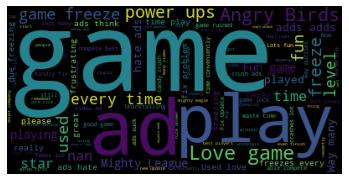

In [ ]:
plt.imshow(text_cloud)
plt.axis(False)
plt.show()

Let us use Style Cloud

In [ ]:
!pip install stylecloud
import stylecloud as sc

     |████████████████████████████████| 266kB 3.4MB/s 
     |████████████████████████████████| 163kB 8.0MB/s 
     |████████████████████████████████| 81kB 5.5MB/s 
     |████████████████████████████████| 92kB 5.7MB/s 
  Created wheel for stylecloud: filename=stylecloud-0.5.1-cp36-none-any.whl size=259506 sha256=6e78664ce839b7b7179b89a41a9652e5aa9e42f021f5c49b033b9c23a0d15306
  Stored in directory: /root/.cache/pip/wheels/fb/19/e2/5e95c310c5a86586048ced770f35e60a8221be7ef0138f61ca
  Created wheel for fire: filename=fire-0.3.1-py2.py3-none-any.whl size=111005 sha256=a27ebdf1072fdaa6761209f38067ad55f29760f685988aefcdfe41de248931d0
  Stored in directory: /root/.cache/pip/wheels/c1/61/df/768b03527bf006b546dce284eb4249b185669e65afc5fbb2ac
  Created wheel for tinycss: filename=tinycss-0.4-cp36-cp36m-linux_x86_64.whl size=174887 sha256=331c5ac9cc7b27af814efd8fcd8803861232653b7100c1c1b75c0b163cbcf522
  Stored in directory: /root/.cache/pip/wheels/1b/26/08/7390b2e6d5eb3403ef35647f09576459ca567d0

In [ ]:
cloud = sc.gen_stylecloud(text)

In [ ]:
import matplotlib.image as mpimg

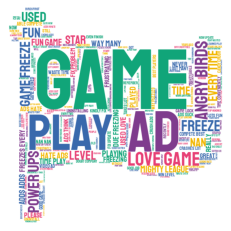

In [ ]:
plt.imshow(mpimg.imread('stylecloud.png'))
plt.axis(False)
plt.show()

In [ ]:
sc.gen_stylecloud(text,icon_name="fab fa-twitter")

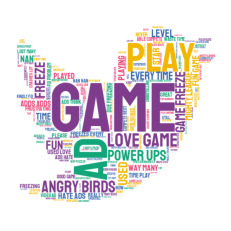

In [ ]:
plt.imshow(mpimg.imread('stylecloud.png'))
plt.axis(False)
plt.show()

Thank You to all of you.